In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
Titanic_data=pd.read_csv("D:/Data MLE/titanic.csv")
Titanic_data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [99]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
Titanic_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked',],axis=1,inplace=True)
Titanic_data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [101]:
Titanic_data.shape

(891, 5)

In [102]:
Titanic_data.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [103]:
Titanic_data.Age=Titanic_data['Age'].fillna(Titanic_data['Age'].mean())
Titanic_data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [104]:
Titanic_data.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [105]:
Titanic_data=pd.get_dummies(Titanic_data,columns=['Sex'],drop_first=True)
Titanic_data['Sex_male']=Titanic_data['Sex_male'].astype(int)
Titanic_data

,Pclass,Age,Fare,Survived,Sex_male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,0,0
889,1,26.000000,30.0000,1,1


In [106]:
X=Titanic_data.drop(['Survived'],axis=1)
X

,Pclass,Age,Fare,Sex_male
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [107]:
y=Titanic_data.Survived

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)


In [109]:
x_train.shape

(712, 4)

In [118]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [119]:
model.score(x_test,y_test)

0.7988826815642458

In [112]:
x_test[:10]

,Pclass,Age,Fare,Sex_male
246,3,25.0,7.7750,0
588,3,22.0,8.0500,1
472,2,33.0,27.7500,0
71,3,16.0,46.9000,0
654,3,18.0,6.7500,0
418,2,30.0,13.0000,1
220,3,16.0,8.0500,1
283,3,19.0,8.0500,1
733,2,23.0,13.0000,1
550,1,17.0,110.8833,1


In [113]:
y_test[:10]

246    0
588    0
472    1
71     0
654    0
418    0
220    1
283    1
733    0
550    1
Name: Survived, dtype: int64

In [114]:
y_pred=model.predict(x_test)

In [115]:
model.predict_proba(x_test[:10])

array([[9.99842887e-01, 1.57113236e-04],
       [9.99836444e-01, 1.63555709e-04],
       [9.53463858e-01, 4.65361425e-02],
       [1.68840561e-05, 9.99983116e-01],
       [9.98425692e-01, 1.57430774e-03],
       [9.99900437e-01, 9.95627883e-05],
       [9.98302705e-01, 1.69729514e-03],
       [9.99472907e-01, 5.27092648e-04],
       [9.98473507e-01, 1.52649344e-03],
       [8.13554658e-17, 1.00000000e+00]])

In [116]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[87, 16],
       [38, 38]], dtype=int64)

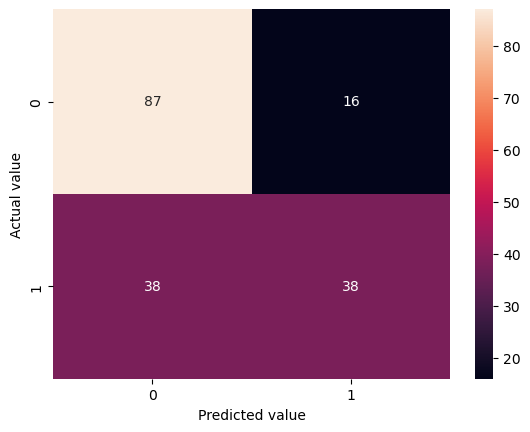

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()